# Import stuff

In [1]:
import pyspark
from pyspark import SparkContext,SQLContext
sc = SparkContext.getOrCreate()

In [2]:
bitCoinPrices = sc.textFile('bitcoinprices.txt')

### splits that string into a list of parts 

In [3]:
bitCoinPrices.map(lambda x: x.split(',')).take(10)

[['24-01-2019 18:13', '3599.139761'],
 ['04-02-2019 13:47', '3470.773629'],
 ['13-02-2019 07:49', '3646.574185'],
 ['14-02-2019 08:30', '3635.891687'],
 ['20-01-2019 11:13', '3730.922146'],
 ['15-01-2019 12:10', '3695.74985'],
 ['05-01-2019 11:43', '3900.515423'],
 ['04-02-2019 13:34', '3474.445685'],
 ['20-01-2019 11:21', '3733.551504'],
 ['07-02-2019 19:08', '3417.109918']]

### Read a CSV file into a Spark DataFrame

In [4]:
bitCoinPrices=spark.read.csv('bitcoinprices.txt', mode="DROPMALFORMED",inferSchema=True, header = False)

### Rename Column C0 with Date and C1 with Price

In [5]:
bitCoinPrices = bitCoinPrices.withColumnRenamed('_c0','date').withColumnRenamed('_c1','price')

In [6]:
bitCoinPrices.sort('date').head(101)

[Row(date='01-01-2019 18:33', price=3765.820089),
 Row(date='01-01-2019 18:35', price=3767.706964),
 Row(date='01-01-2019 18:36', price=3767.706964),
 Row(date='01-01-2019 18:37', price=3767.706964),
 Row(date='01-01-2019 18:38', price=3768.422508),
 Row(date='01-01-2019 18:39', price=3768.422508),
 Row(date='01-01-2019 18:40', price=3768.422508),
 Row(date='01-01-2019 18:41', price=3764.16957),
 Row(date='01-01-2019 18:42', price=3764.16957),
 Row(date='01-01-2019 18:43', price=3764.16957),
 Row(date='01-01-2019 18:44', price=3772.656295),
 Row(date='01-01-2019 18:45', price=3772.656295),
 Row(date='01-01-2019 18:46', price=3771.072375),
 Row(date='01-01-2019 18:47', price=3771.072375),
 Row(date='01-01-2019 18:48', price=3771.072375),
 Row(date='01-01-2019 18:49', price=3763.309002),
 Row(date='01-01-2019 18:50', price=3763.309002),
 Row(date='01-01-2019 18:51', price=3763.309002),
 Row(date='01-01-2019 18:52', price=3763.311666),
 Row(date='01-01-2019 18:53', price=3763.311666),
 Ro

### Read a CSV file into a Spark DataFrame

In [7]:
tweetSents=spark.read.csv('sentiment6.txt', mode="DROPMALFORMED",inferSchema=True, header = False)

### Rename Column C0 with Date and C1 with Sentimentprob 

In [8]:
tweetSents = tweetSents.withColumnRenamed('_c0','date').withColumnRenamed('_c1','SentimentProb')

In [9]:
tweetSents.sort('date').head(101)

[Row(date='01-01-2019 18:33', SentimentProb=0.097455824),
 Row(date='01-01-2019 18:35', SentimentProb=0.097455824),
 Row(date='01-01-2019 18:36', SentimentProb=0.095617943),
 Row(date='01-01-2019 18:37', SentimentProb=0.095617943),
 Row(date='01-01-2019 18:38', SentimentProb=0.095617943),
 Row(date='01-01-2019 18:39', SentimentProb=0.095617943),
 Row(date='01-01-2019 18:40', SentimentProb=0.095617943),
 Row(date='01-01-2019 18:41', SentimentProb=0.095617943),
 Row(date='01-01-2019 18:42', SentimentProb=0.097455824),
 Row(date='01-01-2019 18:43', SentimentProb=0.098073991),
 Row(date='01-01-2019 18:44', SentimentProb=0.098073991),
 Row(date='01-01-2019 18:45', SentimentProb=0.098073991),
 Row(date='01-01-2019 18:46', SentimentProb=0.098073991),
 Row(date='01-01-2019 18:47', SentimentProb=0.098073991),
 Row(date='01-01-2019 18:48', SentimentProb=0.101294061),
 Row(date='01-01-2019 18:49', SentimentProb=0.096603403),
 Row(date='01-01-2019 18:50', SentimentProb=0.092325328),
 Row(date='01-

### Import stuff

In [10]:
import pandas

In [11]:
import ts.flint
from ts.flint import FlintContext

### Define the model by calling ARIMA() and passing in the p, d, and q parameters.

### The statsmodels library provides the capability to fit an ARIMA model.
An ARIMA model can be created using the statsmodels library as follows:
1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

### We fit an ARIMA(12,1,0) model. This sets the lag value to 12 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.
### When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

C:\Users\Atharva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Atharva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Atharva\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Atharva\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: 

                             ARIMA Model Results                              
Dep. Variable:          D.3599.139761   No. Observations:                  823
Model:                ARIMA(12, 1, 0)   Log Likelihood               -5446.597
Method:                       css-mle   S.D. of innovations            180.903
Date:                Sun, 17 Feb 2019   AIC                          10921.195
Time:                        18:17:03   BIC                          10987.176
Sample:                             1   HQIC                         10946.508
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1053      0.892      0.118      0.906      -1.642       1.853
ar.L1.D.3599.139761     -0.9157      0.035    -26.314      0.000      -0.984      -0.848
ar.L2.D.3599

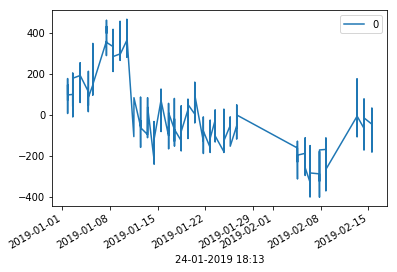

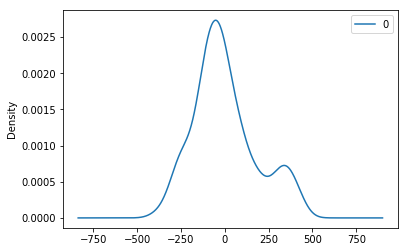

                0
count  823.000000
mean     0.466582
std    181.138940
min   -402.310831
25%   -113.098287
50%    -28.787713
75%     90.385882
max    465.923982


In [14]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
def parser(x):
    return datetime.strptime(x, '%d-%m-%Y %H:%M')

series = read_csv('bitcoinprices.txt', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# fit model
model = ARIMA(series, order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

#### Running the example prints a summary of the fit model. This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations. 

1.First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

2.we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

3.Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

# Running the example prints the first 5 rows of the dataset.

In [17]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
def parser(x):
    return datetime.strptime(x, '%d-%m-%Y %H:%M')

y = read_csv('bitcoinprices.txt', header=None,names=['time','price'], parse_dates=[0], index_col=False, squeeze=True, date_parser=parser)
y.head()


,time,price
0,2019-01-24 18:13:00,3599.139761
1,2019-02-04 13:47:00,3470.773629
2,2019-02-13 07:49:00,3646.574185
3,2019-02-14 08:30:00,3635.891687
4,2019-01-20 11:13:00,3730.922146


In [18]:
#x=y.sort(["time"])
x = y.sort_values('time',axis=0)
x.to_csv('bitcoinsort.csv', index=False)

# Rolling Forecast ARIMA Model

In [20]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np
def parser(x):    
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

series = read_csv('bitcoinsort.csv', header='infer', dtype={'time':np.str,'price':np.float64},parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(12,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3604.969805, expected=3605.262122
predicted=3604.952544, expected=3604.278413
predicted=3603.991061, expected=3604.278413
predicted=3603.979790, expected=3604.097795
predicted=3603.798750, expected=3604.097795
predicted=3603.802026, expected=3604.097795
predicted=3603.799524, expected=3591.121327
predicted=3590.847791, expected=3591.121327
predicted=3590.771933, expected=3591.121327
predicted=3590.767037, expected=3590.826052
predicted=3590.547743, expected=3590.826052
predicted=3590.503053, expected=3590.826052
predicted=3590.513689, expected=3590.401235
predicted=3590.080347, expected=3590.401235
predicted=3590.174684, expected=3590.401235
predicted=3590.034600, expected=3591.711829
predicted=3591.367667, expected=3591.711829
predicted=3591.452487, expected=3591.711829
predicted=3591.395813, expected=3592.161890
predicted=3591.844585, expected=3592.161890
predicted=3591.857467, expected=3592.161890
predicted=3591.852049, expected=3594.028588
predicted=3593.714711, expected=

predicted=3452.062157, expected=3452.510052
predicted=3452.048883, expected=3453.083485
predicted=3452.385478, expected=3453.083485
predicted=3452.720668, expected=3453.083485
predicted=3452.678871, expected=3451.962758
predicted=3451.394786, expected=3451.962758
predicted=3451.534489, expected=3451.962758
predicted=3451.535900, expected=3455.341196
predicted=3454.901101, expected=3455.341196
predicted=3454.902849, expected=3455.341196
predicted=3454.927447, expected=3455.341196
predicted=3454.903995, expected=3453.259387
predicted=3452.835623, expected=3453.259387
predicted=3452.827155, expected=3450.315634
predicted=3449.889742, expected=3450.315634
predicted=3449.871681, expected=3450.315634
predicted=3449.891640, expected=3447.797509
predicted=3447.390440, expected=3447.797509
predicted=3447.362970, expected=3447.797509
predicted=3447.378365, expected=3649.575931
predicted=3648.490419, expected=3649.575931
predicted=3649.546254, expected=3649.575931
predicted=3649.649150, expected=

### Running the example prints the prediction and expected value each iteration. 

In [21]:
from sklearn.metrics import mean_absolute_error
MAE = (mean_absolute_error(test, predictions))
print('Test MAE: %.3f' %MAE)

Test MAE: 2.806


### Mean squared error score (MSE)

Test MSE: 286.918


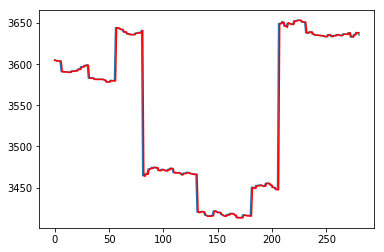

In [22]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### RMSE

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_1 = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse_1)

Test RMSE: 16.939
